# Linear regression on the body data set (with validation)
Math 395 Learning from Large Data Sets 

Fall 2024, Hope College

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 

## load the data set, separate response from features, and scale the features

In [2]:
df = pd.read_table(f'{os.getcwd()}/datasets/bodydata.txt', header = None, sep='\s+')

y = df[[22]] # weight

X = df[df.columns.drop([22])]  # matrix of all features (without weight)
X = StandardScaler().fit_transform(X) ## standardize features

X.shape, y.shape

((507, 24), (507, 1))

## randomly partition the data into training (80%) and test (20%)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((405, 24), (405, 1), (102, 24), (102, 1))

## Simple linear regression (weight ~ height)

RMSE_test = 8.42120767595469


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


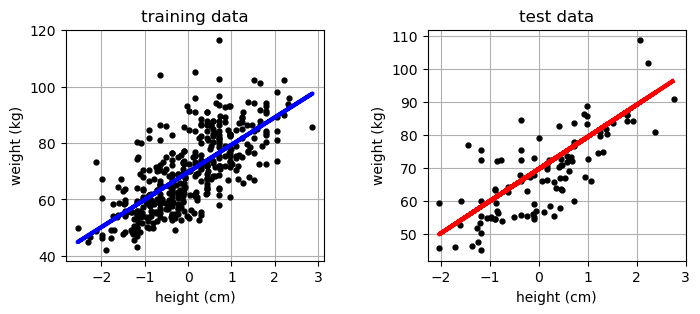

In [4]:
x_train = X_train[:,-2].reshape(-1,1) # predictor (feature)
n_train = y_train.shape[0] # number of training data points 

LRmodel1 = LinearRegression().fit(x_train, y_train)  # fit a linear reg model on training data
yhat_train = LRmodel1.predict(x_train)

x_test = X_test[:,-2].reshape(-1,1) # predictor (feature)
n_test = y_test.shape[0]

yhat_test = LRmodel1.predict(x_test)     # prediction on test data

residuals = y_test - yhat_test
rmse_test_1 = np.sqrt(np.sum(residuals**2) / n_test) # rmse for test data


fig, axs = plt.subplots(1, 2, figsize=(8, 3))

fig.subplots_adjust(wspace=.4)

plt.subplot(1,2,1)

plt.plot(x_train,y_train,'k.', markersize=7)
plt.plot(x_train,yhat_train,'b-', linewidth=3)
plt.xlabel('height (cm)');
plt.ylabel('weight (kg)');
plt.grid('on')
plt.title('training data')

plt.subplot(1,2,2)

plt.plot(x_test,y_test,'k.', markersize=7)
plt.plot(x_test,yhat_test,'r-', linewidth=3)
plt.xlabel('height (cm)');
plt.ylabel('weight (kg)');
plt.grid('on')
plt.title('test data')

print('RMSE_test =', rmse_test_1.values[0])

## Multiple linear regression (weight ~ height+sex)

In [5]:
xx_train = X_train[:,[-1,-2]] # height and sex
xx_test = X_test[:,[-1,-2]] 

LRmodel2 = LinearRegression().fit(xx_train, y_train)  # fit a linear reg model with intercept
yhat_test = LRmodel2.predict(xx_test)     # fitted values

residuals = y_test - yhat_test
rmse_test_2 = np.sqrt(np.sum(residuals**2) / n_test)

print('RMSE_test =', rmse_test_2.values[0])

RMSE_test = 7.889697875117556


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## Multiple linear regression with all the features

In [6]:
fullLRmodel = LinearRegression().fit(X_train, y_train)  # fit a linear reg model with intercept
yhat_test = fullLRmodel.predict(X_test)     # fitted values

residuals = y_test - yhat_test
rmse_test_full = np.sqrt(np.sum(residuals**2) / n_test)

print('RMSE_test =', rmse_test_full.values[0])

RMSE_test = 2.1841477615632305


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## Degree 2 polynomial regression

In [7]:
from sklearn.preprocessing import PolynomialFeatures
 
X_poly_train = PolynomialFeatures(degree=2).fit_transform(X_train)
X_poly_test = PolynomialFeatures(degree=2).fit_transform(X_test)

polyModel= LinearRegression().fit(X_poly_train, y_train)
yhat_test = polyModel.predict(X_poly_test)     # fitted values

residuals = y_test - yhat_test
rmse_test_poly = np.sqrt(np.sum(residuals**2) / n_test)

print('RMSE_test =', rmse_test_poly.values[0])

RMSE_test = 5.013043504697371


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## Ridge regression

In [8]:
from sklearn.linear_model import Ridge

ridgeLRmodel = Ridge(alpha=5).fit(X_train, y_train)

yhat_test = ridgeLRmodel.predict(X_test)

residuals = y_test - yhat_test

rmse_test_ridge = np.sqrt(np.sum(residuals**2)/n_test)

print('RMSE_test =', rmse_test_ridge.values[0])


RMSE_test = 2.158368632289303


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## LASSO regression

In [9]:
from sklearn.linear_model import Lasso

lassoLRmodel = Lasso(alpha=.031).fit(X_train, y_train)

yhat_test = lassoLRmodel.predict(X_test).reshape(-1,1)

residuals = y_test - yhat_test

rmse_test_lasso = np.sqrt(np.sum(residuals**2)/n_test)

print('RMSE_test =', rmse_test_lasso.values[0])

RMSE_test = 2.1507320766101206


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## plot training and test errors together

/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduct

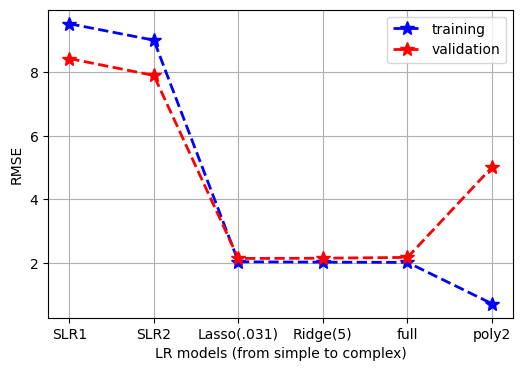

In [10]:
# simple linear model 1 
yhat_train = LRmodel1.predict(x_train) 
residuals = y_train - yhat_train
rmse_train_1 = np.sqrt(np.sum(residuals**2) / n_train)

# simple linear model 2
yhat_train = LRmodel2.predict(xx_train) 
residuals = y_train - yhat_train
rmse_train_2 = np.sqrt(np.sum(residuals**2) / n_train)

# full linear model
yhat_train = fullLRmodel.predict(X_train) 
residuals = y_train - yhat_train
rmse_train_full = np.sqrt(np.sum(residuals**2) / n_train)

# degree 2 polynomial model
yhat_train = polyModel.predict(X_poly_train) 
residuals = y_train - yhat_train
rmse_train_poly = np.sqrt(np.sum(residuals**2) / n_train)

# ridge model
yhat_train = ridgeLRmodel.predict(X_train) 
residuals = y_train - yhat_train
rmse_train_ridge = np.sqrt(np.sum(residuals**2) / n_train)

# lasso model
yhat_train = lassoLRmodel.predict(X_train).reshape(-1,1)
residuals = y_train - yhat_train
rmse_train_lasso = np.sqrt(np.sum(residuals**2) / n_train)

plt.figure(figsize=(6,4))
plt.plot([rmse_train_1, rmse_train_2, rmse_train_lasso, rmse_train_ridge, rmse_train_full, rmse_train_poly], color='blue',linestyle='dashed',linewidth =2,
         marker='*', markersize=10) # 
plt.plot([rmse_test_1, rmse_test_2, rmse_test_lasso, rmse_test_ridge, rmse_test_full, rmse_test_poly], color='red',linestyle='dashed',linewidth =2,
         marker='*', markersize=10) # 
plt.legend(['training', 'validation'])
plt.xlabel('LR models (from simple to complex)');
plt.ylabel('RMSE');
plt.grid('on')
plt.xticks(ticks = [0,1,2,3,4,5], labels=['SLR1','SLR2','Lasso(.031)', 'Ridge(5)', 'full', 'poly2']);

## internal cross validation in Ridge and Lasso regression

In [11]:
from sklearn.linear_model import RidgeCV

alpha_values = (0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200)
ridgeCVmodel = RidgeCV(alphas=alpha_values, cv=5) # 5 fold

ridgeCVmodel.fit(X_train, y_train)

print('best alpha =', ridgeCVmodel.alpha_)

best alpha = 5.0


In [12]:
from sklearn.linear_model import LassoCV

lassoCVmodel = LassoCV(cv=5).fit(X_train, np.ravel(y_train)) # 5 fold

print('best alpha =', lassoCVmodel.alpha_)

best alpha = 0.031061197075382227


In [13]:
lassoCVmodel.coef_

array([-0.08745506,  0.28104466, -0.        ,  0.74119382,  0.39756527,
        0.18991546,  0.04348381,  0.47746513,  0.        ,  1.0880422 ,
        1.25303108,  3.93640248,  0.        ,  1.41128406,  1.17751258,
        0.07874135,  1.38746424,  0.36860124,  1.11693415,  0.03385138,
       -0.0131586 , -0.45497629,  2.69571198, -0.38229086])